In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


Dataset shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


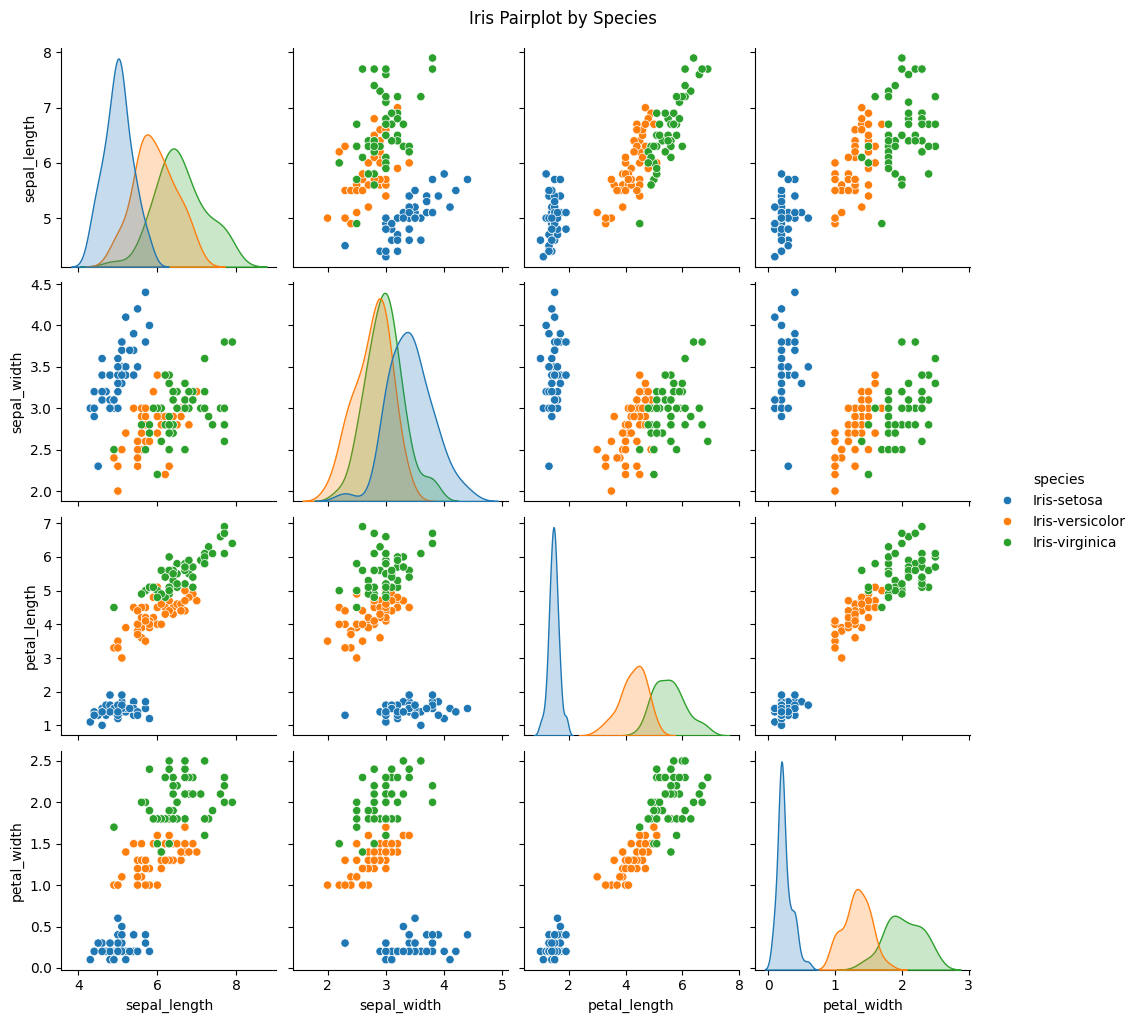


Accuracy Score: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



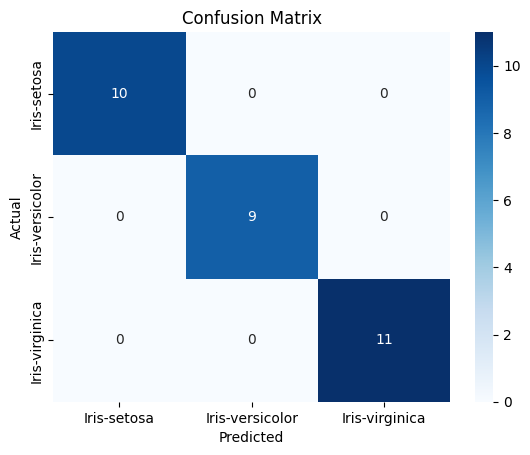

In [16]:
df = pd.read_csv('IRIS.csv')

# Display basic info
print("Dataset shape:", df.shape)
print(df.head())

# 3. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. Pairplot for visual analysis
sns.pairplot(df, hue='species')
plt.suptitle("Iris Pairplot by Species", y=1.02)
plt.show()

# 5. Prepare features and target
X = df.drop('species', axis=1)
y = df['species']

# 6. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predictions and evaluation
y_pred = model.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()